In [126]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta







In [127]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [128]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [129]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [130]:



df = getQuotes(frameM30, 2023)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1672617600,1.06959,1.07017,1.06936,1.06937,71,54,0
1,1672619400,1.06936,1.06965,1.06883,1.06892,2833,71,0
2,1672621200,1.06892,1.06978,1.06873,1.06968,212,54,0
3,1672623000,1.06968,1.07021,1.06957,1.07021,208,54,0
4,1672624800,1.07012,1.07052,1.06953,1.06965,220,22,0
...,...,...,...,...,...,...,...,...
7568,1691596800,1.09812,1.09871,1.09800,1.09833,2624,8,0
7569,1691598600,1.09833,1.09876,1.09712,1.09800,4184,8,0
7570,1691600400,1.09800,1.09949,1.09773,1.09817,4386,8,0
7571,1691602200,1.09817,1.09873,1.09765,1.09825,3853,8,0


In [131]:




def macd(df, shortEmaPeriod, longEmaPeriod, signalEmaPeriod):
    df[f'ema-{shortEmaPeriod}'] = ta.ema(df['close'], length=shortEmaPeriod)
    df[f'ema-{longEmaPeriod}'] = ta.ema(df['close'], length=longEmaPeriod)
    df['macdline'] = df[f'ema-{shortEmaPeriod}'] - df[f'ema-{longEmaPeriod}']
    df['macdsignal'] = ta.ema(df['macdline'], signalEmaPeriod)
    df['macdoscillator'] = df['macdline'] - df['macdsignal']
    return df





In [132]:


shortEmaPeriod = 12
longEmaPeriod = 26
signalEmaPeriod = 9

df = macd(df, shortEmaPeriod, longEmaPeriod, signalEmaPeriod)




In [133]:


df




,time,open,high,low,close,tick_volume,spread,real_volume,ema-12,ema-26,macdline,macdsignal,macdoscillator
0,1672617600,1.06959,1.07017,1.06936,1.06937,71,54,0,NaN,NaN,NaN,NaN,NaN
1,1672619400,1.06936,1.06965,1.06883,1.06892,2833,71,0,NaN,NaN,NaN,NaN,NaN
2,1672621200,1.06892,1.06978,1.06873,1.06968,212,54,0,NaN,NaN,NaN,NaN,NaN
3,1672623000,1.06968,1.07021,1.06957,1.07021,208,54,0,NaN,NaN,NaN,NaN,NaN
4,1672624800,1.07012,1.07052,1.06953,1.06965,220,22,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7568,1691596800,1.09812,1.09871,1.09800,1.09833,2624,8,0,1.097615,1.097261,0.000354,0.000374,-1.933231e-05
7569,1691598600,1.09833,1.09876,1.09712,1.09800,4184,8,0,1.097674,1.097315,0.000359,0.000371,-1.187687e-05
7570,1691600400,1.09800,1.09949,1.09773,1.09817,4386,8,0,1.097750,1.097379,0.000372,0.000371,8.893463e-07
7571,1691602200,1.09817,1.09873,1.09765,1.09825,3853,8,0,1.097827,1.097443,0.000384,0.000373,1.056942e-05


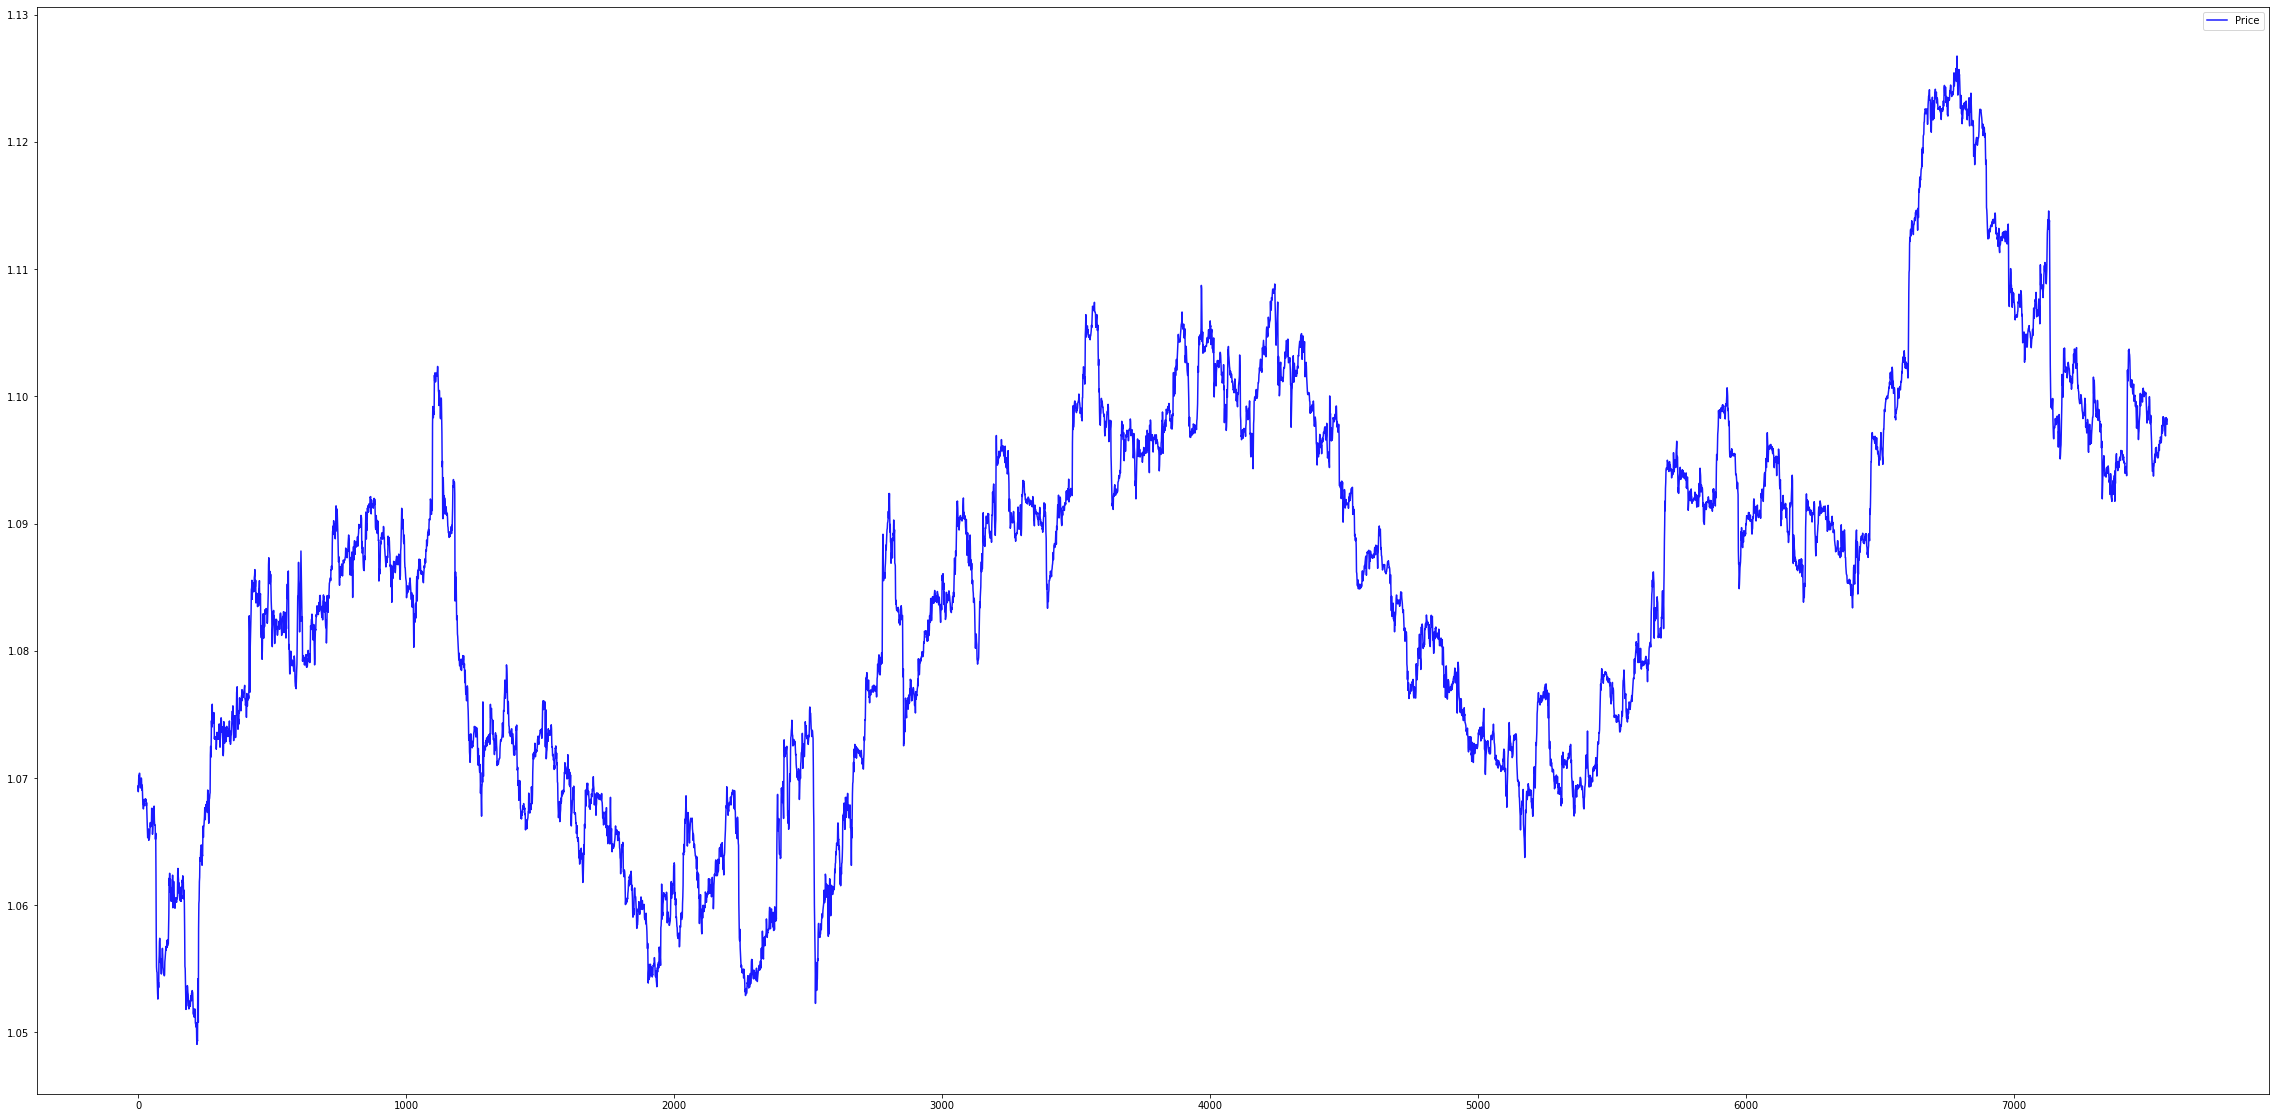

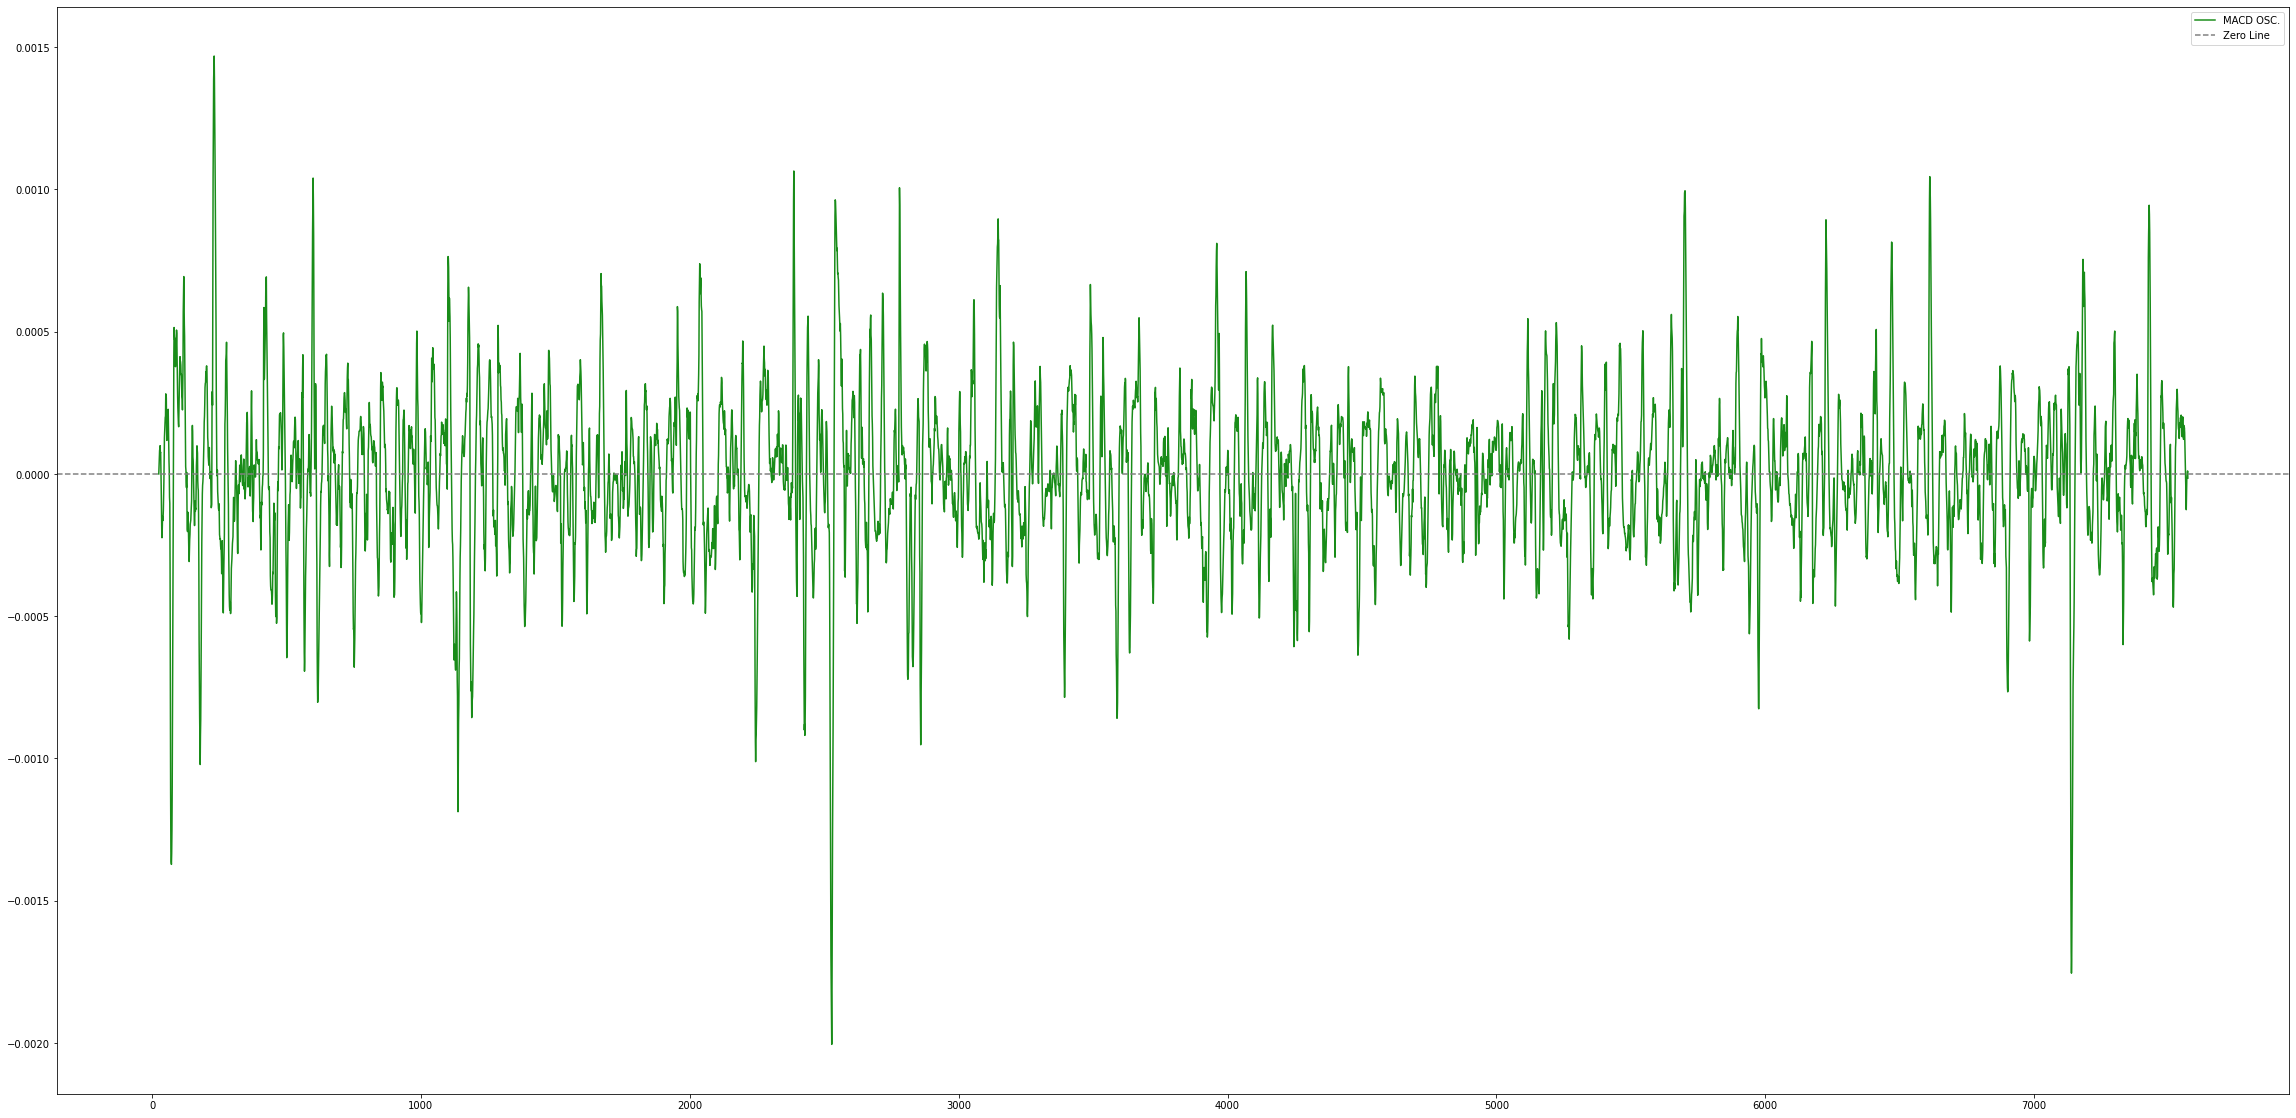

In [134]:


## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Asset Price.
plt.plot(df['close'], label='Price', c='blue', alpha=0.9)

# Showing the plot
plt.legend()
plt.show()



## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Oscillator.
plt.plot(df['macdoscillator'], label='MACD OSC.', c='green', alpha=0.9)
plt.axhline(y=0, color='gray', linestyle='--', label='Zero Line')


# Showing the plot
plt.legend()
plt.show()



In [135]:





buyIndices = []
sellIndices = []
buys = []
sells = []
openPosition = None

for i in range(len(df)):
    if (i > 0) and (openPosition is None) and (df.iloc[i]['macdline'] > df.iloc[i]['macdsignal']) and (df.iloc[i - 1]['macdline'] < df.iloc[i - 1]['macdsignal']):
        openPosition = 'long'
        buyIndices.append(i)
        buys.append(df.iloc[i]['close'])
    elif (i > 0) and (openPosition) and (df.iloc[i]['macdline'] < df.iloc[i]['macdsignal']) and (df.iloc[i - 1]['macdline'] > df.iloc[i - 1]['macdsignal']):
        openPosition = None
        sellIndices.append(i)
        sells.append(df.iloc[i]['close'])





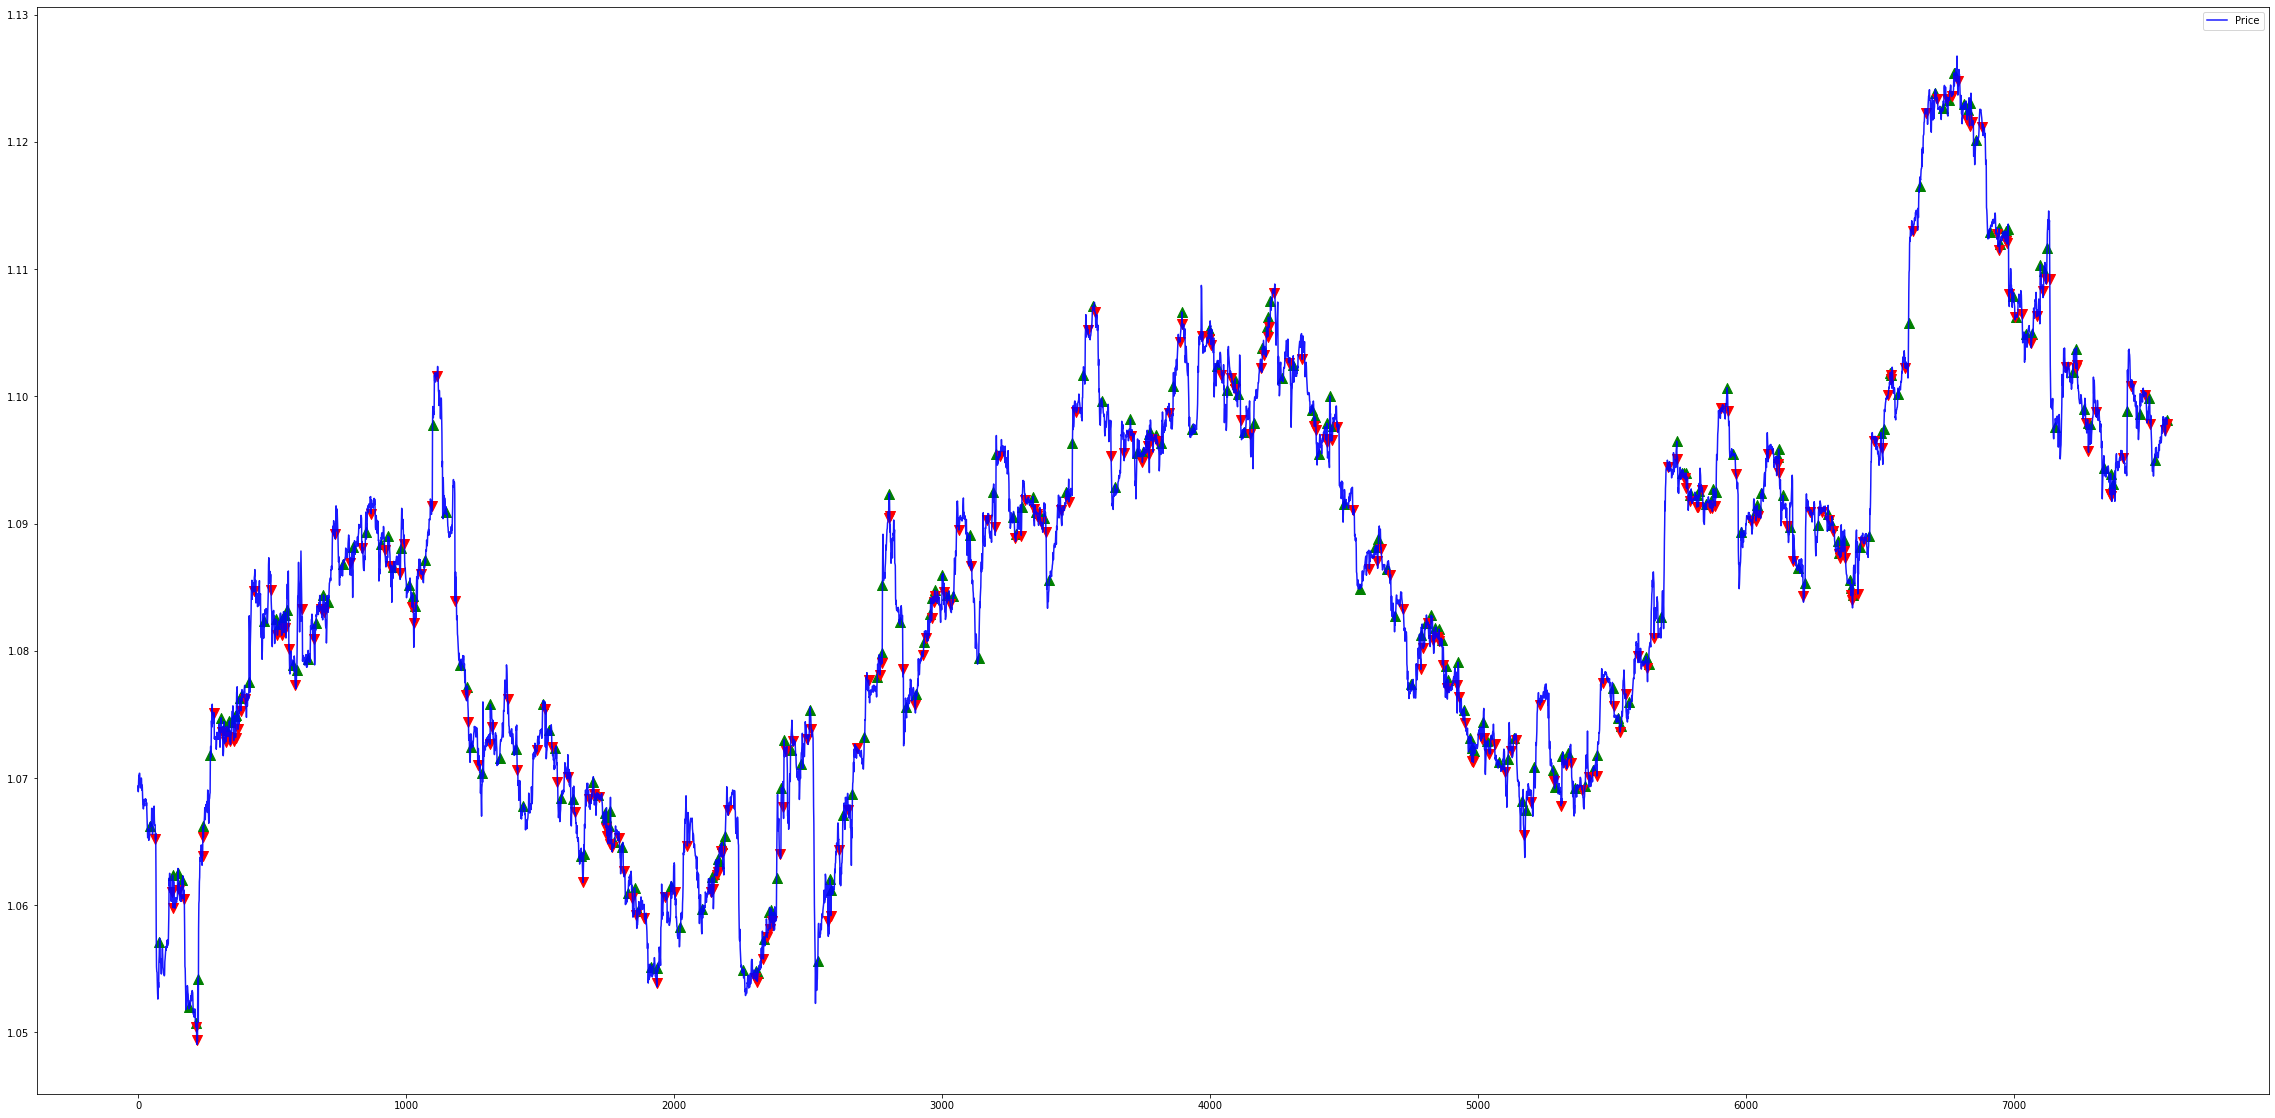

In [136]:









## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Asset Price.
plt.plot(df['close'], label='Price', c='blue', alpha=0.9)
plt.scatter(df.iloc[buyIndices].index, df.iloc[buyIndices]['close'], marker = '^', color = 'g', s = 100)
plt.scatter(df.iloc[sellIndices].index, df.iloc[sellIndices]['close'], marker = 'v', color = 'r', s = 100)

# Showing the plot
plt.legend()
plt.show()











In [137]:






# P & L and other details

totalPL = 0
winTrades = 0
loseTrades = 0
maximumWin = None
maximumLose = None

for i in range(len(sells)):
    netResult = sells[i] - buys[i]

    if netResult < 0:
        loseTrades += 1
    else:
        winTrades += 1

    if not maximumWin:
        maximumWin = netResult
    elif netResult > maximumWin:
        maximumWin = netResult

    if not maximumLose:
        maximumLose = netResult
    elif netResult < maximumLose:
        maximumLose = netResult

    totalPL = totalPL + netResult
    print(f'Net Trade Result = {netResult}')

print(f'Total P & L = {totalPL}')
print(f'Win Trades = {winTrades}')
print(f'Lose Trades = {loseTrades}')
print(f'Maximum Win = {maximumWin}')
print(f'Maximum Lose = {maximumLose}')






Net Trade Result = -0.0010799999999999699
Net Trade Result = 0.003890000000000171
Net Trade Result = -0.0025599999999998957
Net Trade Result = -0.0014000000000000679
Net Trade Result = -0.0014600000000000168
Net Trade Result = -0.0015300000000000313
Net Trade Result = -0.0013500000000001844
Net Trade Result = 0.009669999999999845
Net Trade Result = -0.0009000000000001229
Net Trade Result = 0.003330000000000055
Net Trade Result = -0.0011200000000000099
Net Trade Result = -0.0011200000000000099
Net Trade Result = -0.0005100000000000104
Net Trade Result = -0.0016100000000001113
Net Trade Result = -0.0015000000000000568
Net Trade Result = -0.0017199999999999438
Net Trade Result = -0.0011200000000000099
Net Trade Result = -0.0010200000000000209
Net Trade Result = -0.00018999999999991246
Net Trade Result = 0.007170000000000121
Net Trade Result = 0.0024399999999999977
Net Trade Result = -0.0012699999999998823
Net Trade Result = -0.0006999999999999229
Net Trade Result = -0.0008099999999999774
